In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mns
from sklearn import set_config
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,ShuffleSplit

sns.set_theme(style="whitegrid")
set_config(display="diagram")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# load train dataset
df = pd.read_csv("/kaggle/input/titanic/train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# shape of the dataset
df.shape

(891, 12)

In [4]:
# basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# basic statical info
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


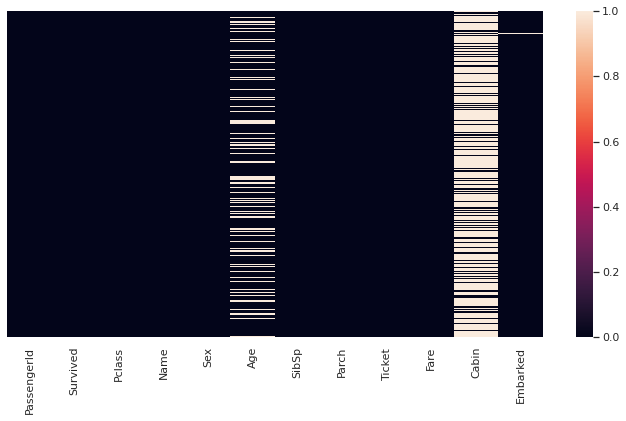

In [6]:
# Check for the null values
plt.figure(figsize=(12,6))
sns.heatmap(df.isna(),yticklabels=False)
plt.show()

In [7]:
# percentage of the missing values
round(df.isna().sum() / df.shape[0] * 100,2)

#There is a 77% Missing Values available in cabin column. So, we will drop that column.

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [8]:
# drop cabin column
df.drop("Cabin",axis=1,inplace=True)

In [9]:
# check for the duplicated values
df.duplicated().sum()

0

## Exploratory Data Analysis

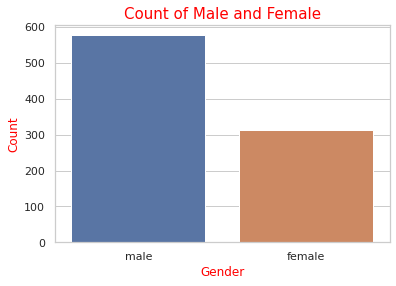

male      577
female    314
Name: Sex, dtype: int64


In [10]:
# Let's Visualize, How many males and females were there ?
sns.countplot(x="Sex",data=df)
plt.title("Count of Male and Female",size=15,color='red')
plt.xlabel("Gender",color='red')
plt.ylabel("Count",color='red')
plt.show()
print(df["Sex"].value_counts())

# We can clearly see Males are more than Females in data.

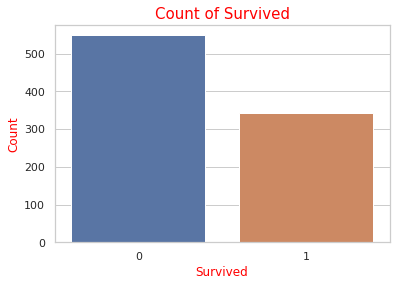

0    549
1    342
Name: Survived, dtype: int64


In [11]:
# Let's see how many passengers are Survived.
sns.countplot(x="Survived",data=df)
plt.title("Count of Survived",size=15,color='red')
plt.xlabel("Survived",color='red')
plt.ylabel("Count",color='red')
plt.show()
print(df["Survived"].value_counts())

# There is only 342 Passengers are Survived out of 891.

In [12]:
# Let' see that 10 Passengers with Highest Fair are Survived or not.
df.sort_values("Fare",ascending=False)[["PassengerId","Name","Sex","Fare","Survived"]][:20]


,PassengerId,Name,Sex,Fare,Survived
258,259,"Ward, Miss. Anna",female,512.3292,1
737,738,"Lesurer, Mr. Gustave J",male,512.3292,1
679,680,"Cardeza, Mr. Thomas Drake Martinez",male,512.3292,1
88,89,"Fortune, Miss. Mabel Helen",female,263.0000,1
27,28,"Fortune, Mr. Charles Alexander",male,263.0000,0
341,342,"Fortune, Miss. Alice Elizabeth",female,263.0000,1
438,439,"Fortune, Mr. Mark",male,263.0000,0
311,312,"Ryerson, Miss. Emily Borie",female,262.3750,1
742,743,"Ryerson, Miss. Susan Parker ""Suzette""",female,262.3750,1
118,119,"Baxter, Mr. Quigg Edmond",male,247.5208,0


### Observation

* Out of 20 total 14 Passengers are Survived with Highest Fair. 
* Females used to pay high fare in compare to Males.

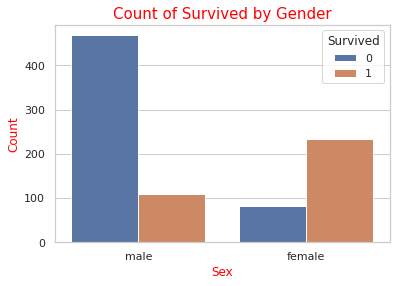

In [13]:
# let's see how many males and females are survived.
sns.countplot(x="Sex",data=df,hue="Survived")
plt.title("Count of Survived by Gender",size=15,color='red')
plt.xlabel("Sex",color='red')
plt.ylabel("Count",color='red')
plt.show()

### Observation

* Survived Rate of Female is Very High in Compare to Male.

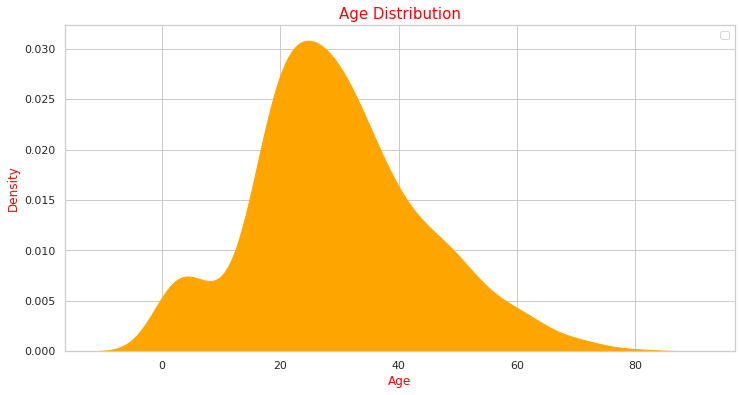

In [14]:
# Let's see Age Distribution
plt.figure(figsize=(12,6))
sns.kdeplot(x="Age",data=df.dropna(),shade=True,alpha=1,color="orange")
plt.title("Age Distribution",size=15,color='red')
plt.xlabel("Age",color='red')
plt.ylabel("Density",color='red')
plt.legend()
plt.show()

### Observation

* Most of the people's age is between 20-40. So, Most of the people were young.
* There is very few people whose age is between 60-80.

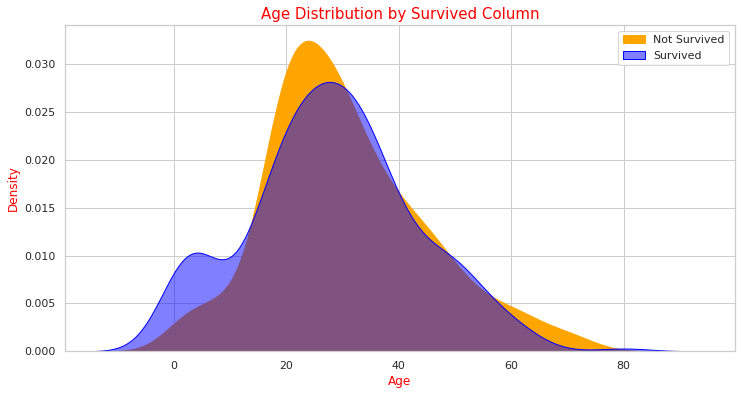

In [15]:
# Let's see Age Distribution by Survived Column
plt.figure(figsize=(12,6))
sns.kdeplot(x="Age",data=df[df['Survived']==0].dropna(),shade=True,alpha=1,color="orange",label="Not Survived")
sns.kdeplot(x="Age",data=df[df['Survived']==1].dropna(),shade=True,alpha=0.5,color="blue",label="Survived")
plt.title("Age Distribution by Survived Column",size=15,color='red')
plt.xlabel("Age",color='red')
plt.ylabel("Density",color='red')
plt.legend()
plt.show()

### Observation

* If your age is between 0-10 (Child) then there is high chance that you survive.
* If your age is between 60-80 (Elder) then there is high chance that you not survive.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

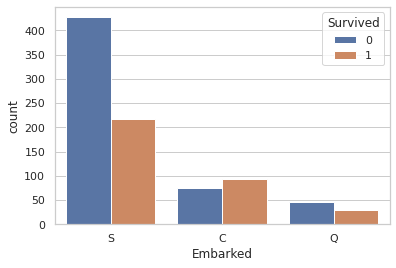

In [16]:
# let's visualize embarked column with Survived
sns.countplot(x="Embarked",data=df,hue="Survived")

### Observation

* around 70% Passengers Mounted from S(Southampton).
* Most of the Passengers who were Mounted from S(Southampton) they weren't Survived. 

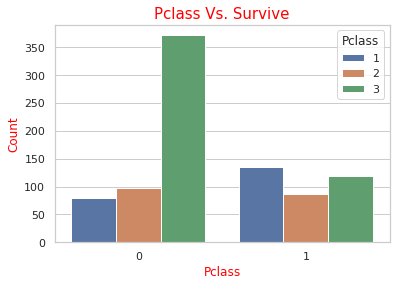

In [17]:
# Let's check which class has less number of chance to survive. 
sns.countplot(x="Survived",data=df,hue="Pclass")
plt.title("Pclass Vs. Survive",size=15,color='red')
plt.xlabel("Pclass",color='red')
plt.ylabel("Count",color='red')
plt.show()

## Observation

* Most of the Passengers from Class 3 weren't Survived.
* Most if the Passengers from Class 1 Survived.

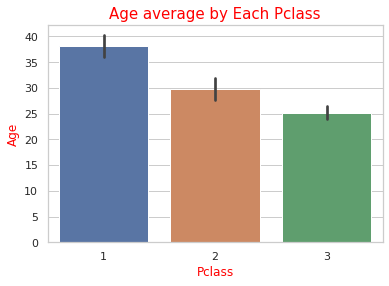

In [18]:
# Let's check average age of Passengers in Every Pclass

sns.barplot(x="Pclass",y="Age",data=df)
plt.title("Age average by Each Pclass",size=15,color='red')
plt.xlabel("Pclass",color='red')
plt.ylabel("Age",color='red')
plt.show()

## Observation

* PClass 1 Average age is around 37, PClass 2 Average age is around 30 and PClass 3 Average age is around 25.
* We can fill Null values of Age column by this average values.

# Data Preprocessing

In [19]:
# Age Column Imputation
def AgeImputation(value):
    age = value[0]
    pclass = value[1]
    
    if np.isnan(age):
        if pclass == 1:
            return 38.10
        elif pclass == 2:
            return 29.87
        else:
            return 25.14
        
    else:
        return age
        
df["Age"] = df[["Age","Pclass"]].apply(AgeImputation,axis=1)

In [20]:
# Embarked Column has Just 2 Null values, we will drop that
df.dropna(inplace=True)

In [21]:
# Drop Redundant Columns like PassengerId, Name, and Ticket 
# That's Not Important in Classification Problem
df.drop(columns=["PassengerId","Name","Ticket"],inplace=True)

In [22]:
# Extract X and y
X = df.drop("Survived",axis=1)
y = df["Survived"]

In [23]:
# train and test split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42,stratify=y)

In [24]:
# creating a pipeline for OneHotEncoding of Categorical Columns
categorical_processor = ColumnTransformer(transformers=[
    ("OHE",OneHotEncoder(drop='first'),["Sex","Embarked"]),
],remainder="passthrough")

pipe = Pipeline(steps=[
    ("Categorical_Processor",categorical_processor),
    ("Standard Scaling",StandardScaler()),
    ("Model",LogisticRegression())
])

In [25]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('Categorical_Processor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first'),
                                                  ['Sex', 'Embarked'])])),
                ('Standard Scaling', StandardScaler()),
                ('Model', LogisticRegression())])

In [26]:
# Accuracy Score on test data
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,pipe.predict(X_test))

0.8258426966292135

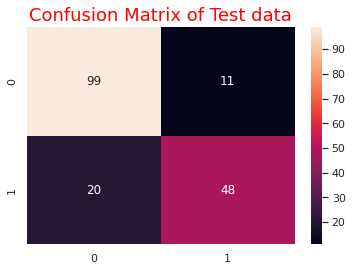

In [27]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test,pipe.predict(X_test)),annot=True)
plt.title("Confusion Matrix of Test data",size=18,color='red')
plt.show()

In [28]:
# load test dataset
df_test = pd.read_csv("/kaggle/input/titanic/test.csv",usecols=["PassengerId","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"])
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [29]:
# Handle Missing Values from test data
df_test["Age"] = df_test[["Age","Pclass"]].apply(AgeImputation,axis=1)
df_test["Fare"] = df_test["Fare"].fillna(df_test["Fare"].mean())

In [30]:
# prediction on test data
test_pred = pipe.predict(df_test.drop("PassengerId",axis=1))

In [31]:
df_test["Survived"] = test_pred

In [32]:
submission = df_test[["PassengerId","Survived"]]
submission.to_csv("Submission.csv",index=False)